## First Investigation of the Coudray Data

In [1]:
# Import libraries
import openslide 
import openslide.deepzoom
import matplotlib.pyplot as plt
import numpy as np 

In [6]:
# Read a svs file with openslide into a DeepZoomGenerator 

# here parameters like the number of levels and the downsampling factor can be specified
image = openslide.OpenSlide('/mnt/gaia/ICIDC/data_coudray/858bf199-5962-4d6e-a059-4d33b04edc17/TCGA-18-3415-01A-01-TS1.d922ab4a-e5c2-4b49-a173-964e569e3985.svs')

# here parameters like the tile size can be specified
image_slide = openslide.deepzoom.DeepZoomGenerator(image)

In [5]:
# Print some information about the observed image
print(image.level_downsamples)
print(image_slide.level_count) # number of deepzoom levels for the slide
print(image_slide.tile_count) # number of tiles for the slide
print(image_slide.level_tiles) # (tiles_x, tiles_y) for each zoom level
print(image_slide.level_dimensions) # (pixel_x, pixel_y) for each zoom level
print(image_slide.get_dzi('png')) 
print(image_slide.get_tile(level=1, address=(0,0)))
print(image_slide.get_tile_coordinates(level=1, address=(0,0)))
print(image_slide.get_tile_dimensions(level=1, address=(0,0)))


(1.0, 4.000118849536487, 8.001188777936282)
16
5042
((1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 2), (2, 3), (4, 5), (7, 9), (14, 17), (28, 34), (56, 67))
((1, 1), (1, 2), (2, 3), (4, 5), (7, 9), (14, 17), (28, 33), (55, 66), (110, 132), (219, 263), (438, 526), (875, 1052), (1750, 2104), (3500, 4208), (7000, 8415), (14000, 16829))
<Image Format="png" Overlap="1" TileSize="254" xmlns="http://schemas.microsoft.com/deepzoom/2008"><Size Height="16829" Width="14000" /></Image>
<PIL.Image.Image image mode=RGB size=1x1 at 0x7EFEEA146ED0>
((0, 0), 2, (1750, 2103))
(1, 2)


average background 0.4781144781144781


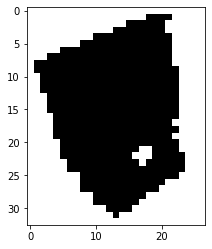

In [50]:
# Visualize a single tile 
tile = image_slide.get_tile(level=6, address=(0,0))
grey = tile.convert('L')
bw = grey.point(lambda x: 0 if x < 220 else 1, mode='F') # F -> 32-bit floating point values
bw_visualize = grey.point(lambda x: 0 if x < 220 else 1, mode='1') # 1 -> 1-bit pixels

plt.imshow(bw_visualize)
print('average background', np.average(np.array(np.asarray(bw_visualize))))

In [46]:
print(np.array(np.asarray(bw)))
print(np.array(np.asarray(bw_visualize)))

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
  1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
  1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
  1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
  1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
  1. 1. 1.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
  1. 1. 1.]
 [1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
  1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
  1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  1. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  1. 1. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0